### CREATING NEW FEATURES
---

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Reading data

In [2]:
fb = pd.read_csv("../data/facebook.csv", index_col=0)
ms = pd.read_csv("../data/microsoft.csv", index_col=0)

### Create new column - Price difference

In [3]:
fb["Price_Diff"] = fb["Close"].shift(-1) - fb["Close"]
ms["Price_Diff"] = ms["Close"].shift(-1) - ms["Close"]

### Create new column - Daily return

In [4]:
fb["Return"] = fb["Price_Diff"]/fb["Close"]
ms["Return"] = ms["Price_Diff"]/ms["Close"]

### Create new column - Direction

The list comprehension means: if the prince difference is larger than 0, denote as 1, otherwise, denote as 0.

In [5]:
fb["Direction"] = [1 if fb["Price_Diff"].loc[indice] > 0 else 0 for indice in fb.index]
ms["Direction"] = [1 if ms["Price_Diff"].loc[indice] > 0 else 0 for indice in ms.index]

### Create new column - Moving average

In [6]:
fb["MA50"] = fb["Close"].rolling(50).mean()
fb["MA200"] = fb["Close"].rolling(200).mean()
ms["MA50"] = ms["Close"].rolling(50).mean()
ms["MA200"] = ms["Close"].rolling(200).mean()

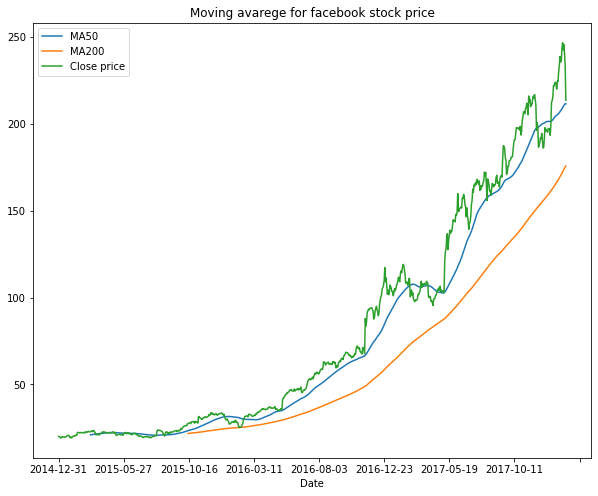

In [13]:
plt.figure(figsize=(10, 8))
fb["MA50"].plot(label="MA50")
fb["MA200"].plot(label="MA200")
fb["Close"].plot(label="Close price")
plt.title("Moving avarege for facebook stock price")
plt.legend()
plt.show()